# 生成供查询股票列表

In [3]:
import time
import requests
import json
import pandas as pd 
import os
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams["font.family"] = 'Arial Unicode MS'

In [27]:
# 获取每日行业板块北上持仓情况
def get_daily_north_datasets():
    time_stamp = time_stamp = int(time.time() * 1000 )
    url = 'http://dcfm.eastmoney.com/em_mutisvcexpandinterface/api/js/get?type=HSGT20_HYTJ_SUM&st=ShareSZ_ZC&sr=-1&token=894050c76af8597a853f5b408b759f5d&p=1&ps=100&filter=(DateType%3D%271%27)&_={}'.format(time_stamp)

    response = requests.get(url=url)
    if response.status_code == 200:
        response_json = response.json()
        if type(response_json) is list and len(response_json) > 0:
            return response_json
        else:
            print('获取数据失败！请重试！')
    else:
        print('获取数据失败！请重试！')


In [28]:
north_data = get_daily_north_datasets()

In [29]:
df = pd.DataFrame(north_data)

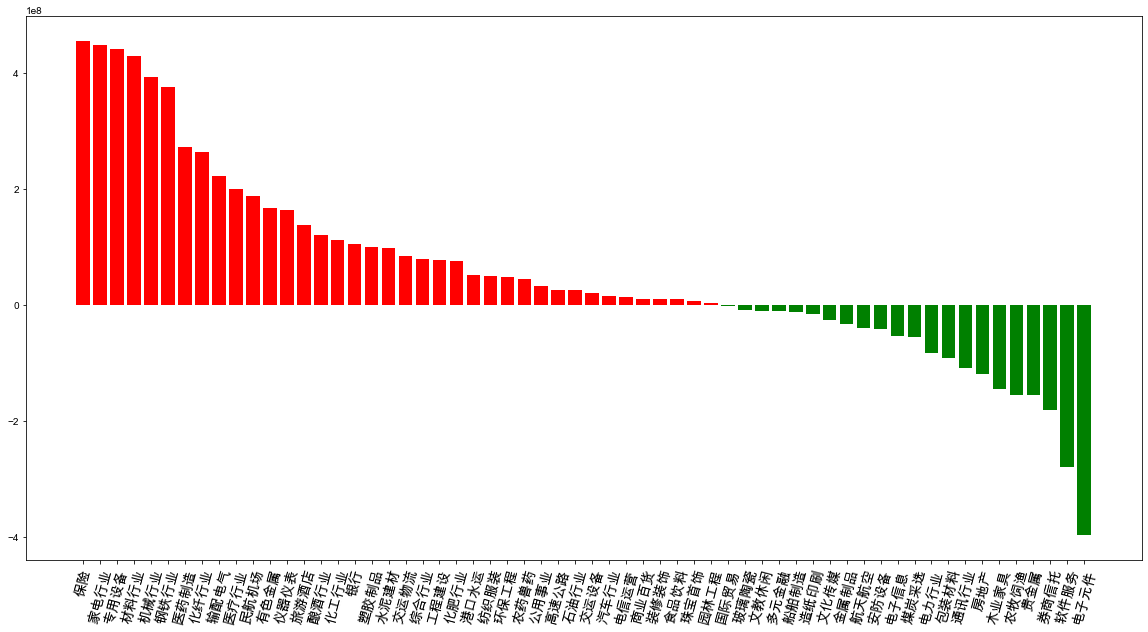

In [30]:
# 排序 

#今日增持排序-市值
plt.figure(figsize=(20,10))
sort_df = df.sort_values('ShareSZ_ZC', ascending=False)
sort_df['ShareSZ_GZ'] = (sort_df['ShareSZ_GZ']/100000000).round(2)
colors = [ 'r' if i>0 else 'g'  for i in sort_df['ShareSZ_ZC']]
plt.bar(sort_df['HYName'],sort_df['ShareSZ_ZC'], color=colors, )
plt.xticks(rotation=75, fontsize=14)
plt.show()

In [31]:
# 处理数据
#今日持股 
df['ShareSZ_GZ'] = (df['ShareSZ_GZ']/100000000).round(2).astype('str')+'亿'
df['ShareHold_Chg_BK'] = (df['ShareHold_Chg_BK']*100).round(2).astype('str')+'%'
df['ShareHold_Chg_GZ'] = (df['ShareHold_Chg_GZ']*100).round(2).astype('str')+'%'
# # 增持
df['ShareSZ_ZC'] = (df['ShareSZ_ZC']/100000000).round(3).astype('str')+'亿'
df['ShareHold_ZC_Chg'] = (df['ShareHold_ZC_Chg']*100).round(2).astype('str')+'%'
df['ShareHold_ZC_Chg_BK'] = (df['ShareHold_ZC_Chg_BK']*1000).round(2).astype('str')+'‰'
df['ShareHold_ZC_Chg_GZ'] = (df['ShareHold_ZC_Chg_GZ']*1000).round(2).astype('str')+'‰'

In [118]:
filter_cols = ['HYName', 
                'Zdf', 
                'Count', 
                'ShareSZ_GZ',
                'ShareHold_Chg_BK',
                'ShareHold_Chg_GZ',
                'ZC_Count',
                'ShareSZ_ZC',
                'ShareHold_ZC_Chg',
                'ShareHold_ZC_Chg_BK',
                'ShareHold_ZC_Chg_GZ',
                'Max_SZ_Name',
                'Max_ZB_Name',
                'Min_SZ_Name',
                'Min_ZB_Name',
                ]
filter_cols_ch = [['', 
                    '', 
                    '北向资金今日持股',
                    '北向资金今日持股',
                    '北向资金今日持股',
                    '北向资金今日持股',
                    '北向资金今日增持估计',
                    '北向资金今日增持估计',
                    '北向资金今日增持估计',
                    '北向资金今日增持估计',
                    '北向资金今日增持估计',
                    '今日增持最大',
                    '今日增持最大',
                    '今日减持最大股',
                    '今日减持最大股'
],
['行业', 
                    '最新涨跌幅', 
                    '支数',
                    '市值',
                    '占板块比',
                    '占北向资金比',
                    '股票支数',
                    '市值',
                    '市值增幅',
                    '占板块比',
                    '占北向资金比',
                    '市值',
                    '占股本比',
                    '市值',
                    '占股本比'
]]

In [119]:
# 替换索引
df = df[filter_cols]
df.columns = filter_cols_ch

In [138]:
def save_data_to_excel(file_name, df):
    root_path = "excels"
    date = time.strftime("%Y-%m-%d", time.localtime())

    date_path = os.path.join(root_path,date)
    file_path = os.path.join(date_path, file_name+'.xlsx')
    
    #判断文件夹是否存在
    if os.path.exists(root_path) is False:
        os.mkdir(root_path)
    if os.path.exists(date_path) is False:
        os.mkdir(date_path)
    # 保存北上数据
    df.to_excel(file_path)


In [139]:
# 保存
save_data_to_excel('行业资金流入情况',df)

In [32]:
df

,HYCode,ORIGINALCODE,HYName,HdDate,Zdf,ZC_Count,Count,ShareHold_Chg_GZ,ShareSZ_ZC,ShareHold_ZC_Chg,...,ShareSZ_ZC_Max,ShareSZ_JC_Min,ShareHold_ZC_Max,ShareHold_JC_Min,DateType,ShareHold_Chg_BK,Max_ZB_Name,Max_ZB_Code,Min_ZB_Name,Min_ZB_Code
0,016028,474,保险,2021-03-18,-2.09,3.0,6.0,6.39%,4.553亿,0.54%,...,0.0,0.0,0.0,0.0,1,2.58%,新华保险,601336,中国人保,601319
1,016019,456,家电行业,2021-03-18,-0.33,11.0,20.0,14.89%,4.485亿,0.24%,...,0.0,0.0,0.0,0.0,1,11.43%,格力电器,000651,海信家电,000921
2,016061,910,专用设备,2021-03-18,0.39,21.0,37.0,2.31%,4.427亿,1.52%,...,0.0,0.0,0.0,0.0,1,4.02%,先导智能,300450,欧普康视,300595
3,016040,537,材料行业,2021-03-18,-0.83,9.0,27.0,3.65%,4.298亿,0.93%,...,0.0,0.0,0.0,0.0,1,4.85%,国轩高科,002074,格林美,002340
4,016043,545,机械行业,2021-03-18,-0.13,23.0,44.0,7.54%,3.942亿,0.41%,...,0.0,0.0,0.0,0.0,1,7.16%,埃斯顿,002747,三丰智能,300276
5,016033,479,钢铁行业,2021-03-18,-0.85,13.0,22.0,2.13%,3.766亿,1.4%,...,0.0,0.0,0.0,0.0,1,3.3%,方大特钢,600507,太钢不锈,000825
6,016024,465,医药制造,2021-03-18,0.27,73.0,120.0,14.41%,2.72亿,0.15%,...,0.0,0.0,0.0,0.0,1,4.24%,瑞普生物,300119,沃森生物,300142
7,016026,471,化纤行业,2021-03-18,-2.32,7.0,9.0,0.93%,2.633亿,2.32%,...,0.0,0.0,0.0,0.0,1,1.75%,桐昆股份,601233,华西股份,000936
8,016020,457,输配电气,2021-03-18,0.23,21.0,36.0,3.86%,2.233亿,0.45%,...,0.0,0.0,0.0,0.0,1,4.96%,思源电气,002028,骆驼股份,601311
9,016047,727,医疗行业,2021-03-18,-0.01,20.0,35.0,5.61%,2.008亿,0.28%,...,0.0,0.0,0.0,0.0,1,4.54%,睿智医药,300149,蓝帆医疗,002382
